#**1. Bussiness Understanding**


*   Tujuan: Membantu Mr. Cho dalam memilih properti rumah yang sesuai dengan kriteria.
*   Permasalahan: Memilih rumah yang memenuhi syarat tahun pembangunan dan renovasi.
*   Kebutuhan: Analisis data properti untuk menemukan rumah terbaik.





# **2. Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data_porto_2.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# **3. Data Preparation**
**3.1 Handle Inconsistent Data**

In [6]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 densmore ave n,shoreline,wa 98133,usa
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 w blaine st,seattle,wa 98119,usa
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd ave se,kent,wa 98042,usa
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th pl ne,bellevue,wa 98008,usa
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th ave ne,redmond,wa 98052,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 n 143rd st,seattle,wa 98133,usa
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 se 10th pl,bellevue,wa 98007,usa
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 ilwaco pl ne,renton,wa 98059,usa
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 s creston st,seattle,wa 98178,usa


**3.2 Handle Missing Values**

In [7]:
missing_values = df.isnull().sum()
missing_values
df = df.drop(['waterfront', 'view'], axis=1)
df['price'].replace(0, np.nan, inplace=True)


<ipython-input-7-5e1f133f5736>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(0, np.nan, inplace=True)


In [8]:
# Mengisi missing value dengan median atau modus, jika ada
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-8-5094e55a1918>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-8-5094e55a1918>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

**3.3 Handle Outliers**

Menggunakan metode IQR

In [9]:
# plt.figure(figsize=(25, 7))
# sns.boxplot(x='city', y='price', data=df)
# plt.title('Harga Rumah Berdasarkan Kota di USA')
# plt.xticks(rotation=45)
# plt.show()

In [10]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [11]:
# plt.figure(figsize=(25, 7))
# sns.boxplot(x='city', y='price', data=df)
# plt.title('Harga Rumah Berdasarkan Kota di USA')
# plt.xticks(rotation=45)
# plt.show()

**3.4 Handle Duplicated Values**

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 densmore ave n,shoreline,wa 98133,usa
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,26206-26214 143rd ave se,kent,wa 98042,usa
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,857 170th pl ne,bellevue,wa 98008,usa
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th ave ne,redmond,wa 98052,usa
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,3,880,0,1938,1994,522 ne 88th st,seattle,wa 98115,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,4,1510,0,1954,1979,501 n 143rd st,seattle,wa 98133,usa
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,3,1460,0,1983,2009,14855 se 10th pl,bellevue,wa 98007,usa
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,3,3010,0,2009,0,759 ilwaco pl ne,renton,wa 98059,usa
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,3,1070,1020,1974,0,5148 s creston st,seattle,wa 98178,usa


# **4. Exploratory Data Analysis (EDA)**

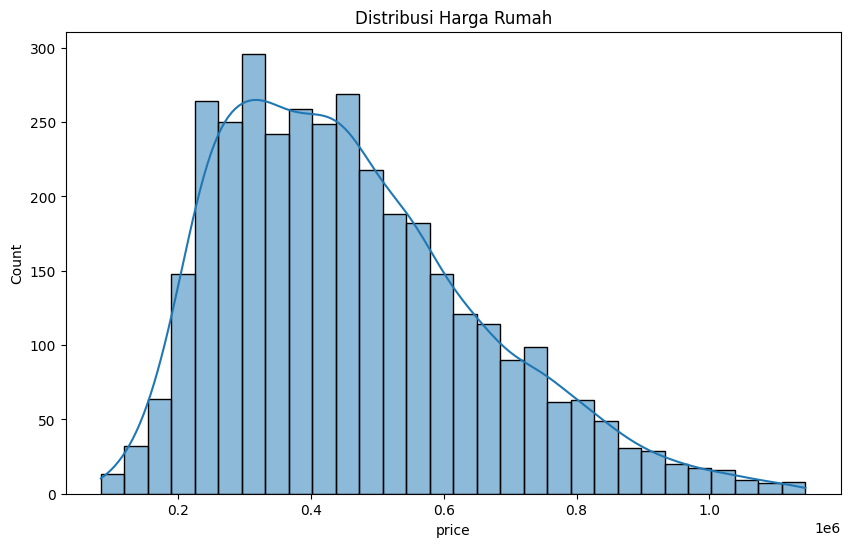

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah')
plt.show()

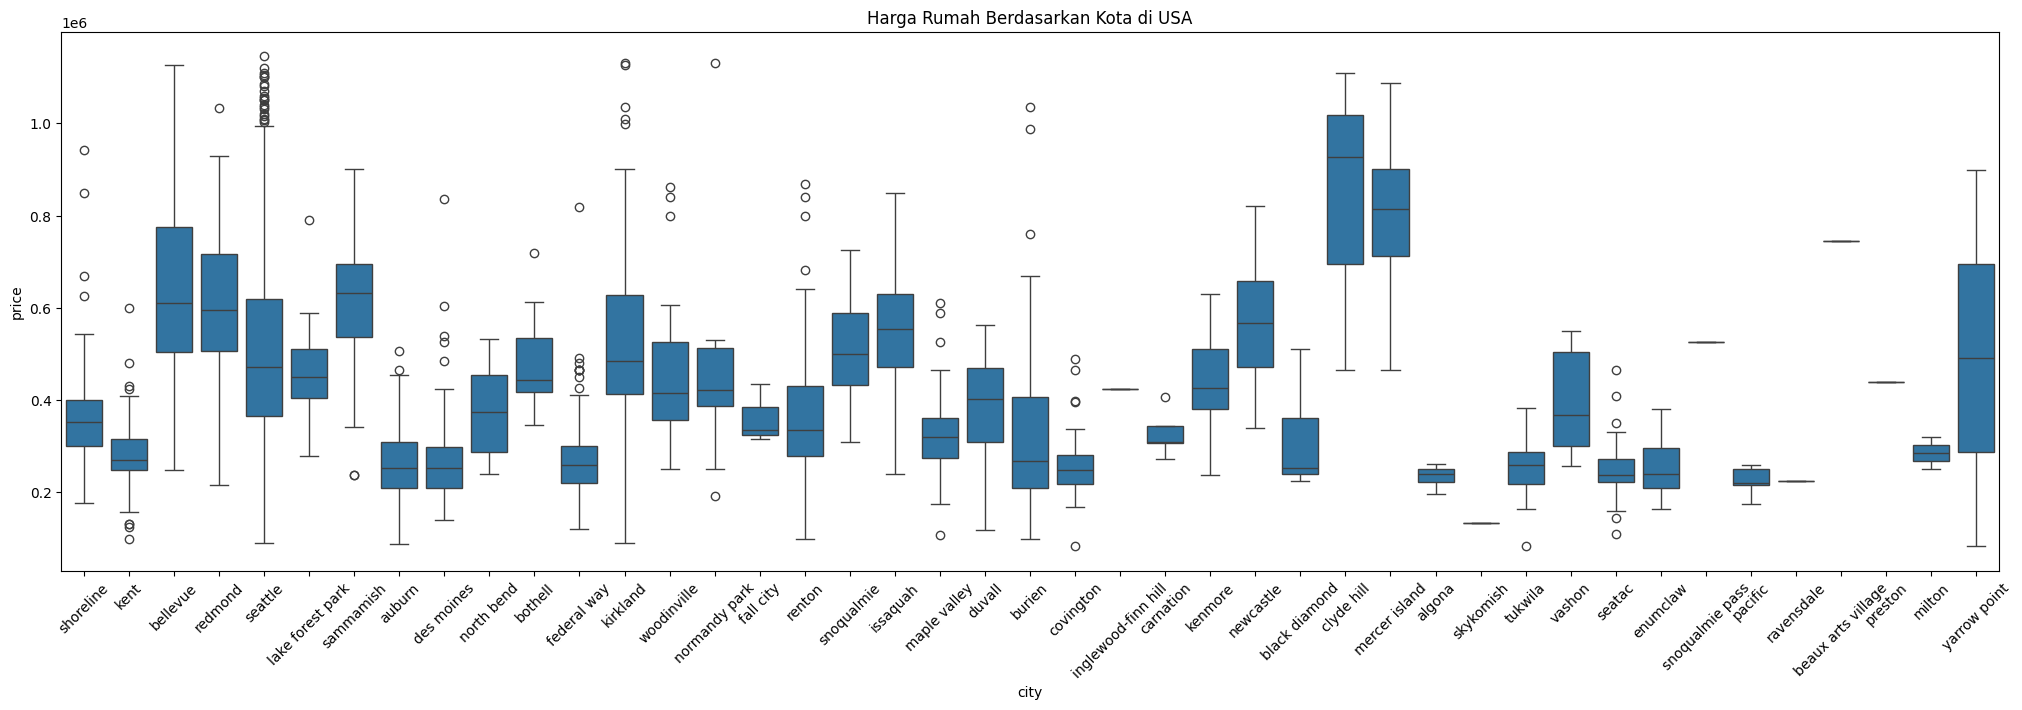

In [15]:
plt.figure(figsize=(25, 7))
sns.boxplot(x='city', y='price', data=df)
plt.title('Harga Rumah Berdasarkan Kota di USA')
plt.xticks(rotation=45)
plt.show()

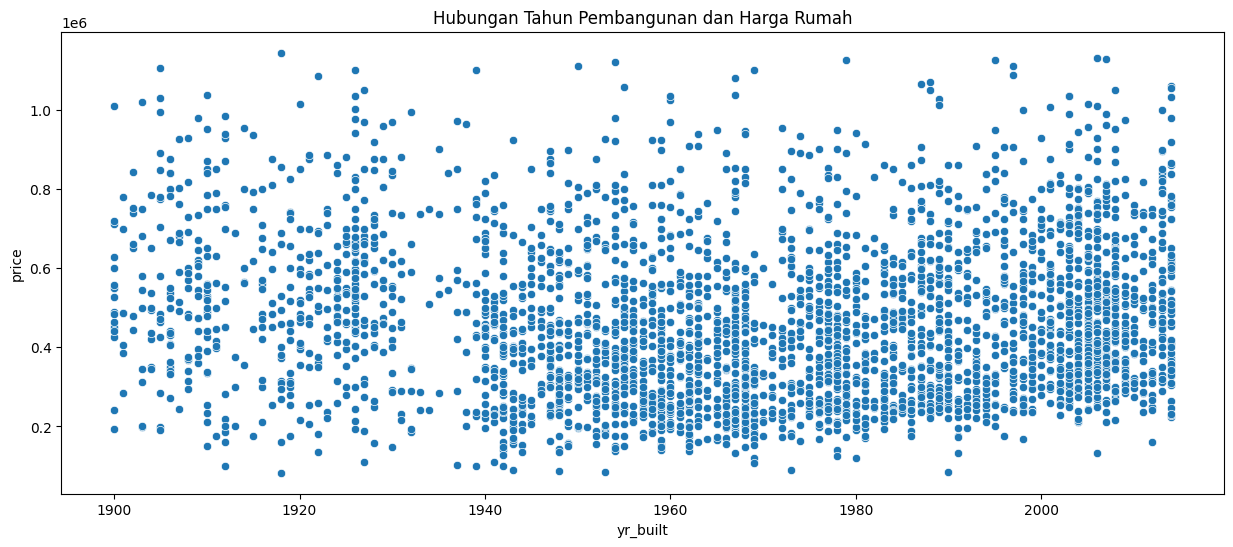

In [16]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='yr_built', y='price', data=df)
plt.title('Hubungan Tahun Pembangunan dan Harga Rumah')
plt.show()

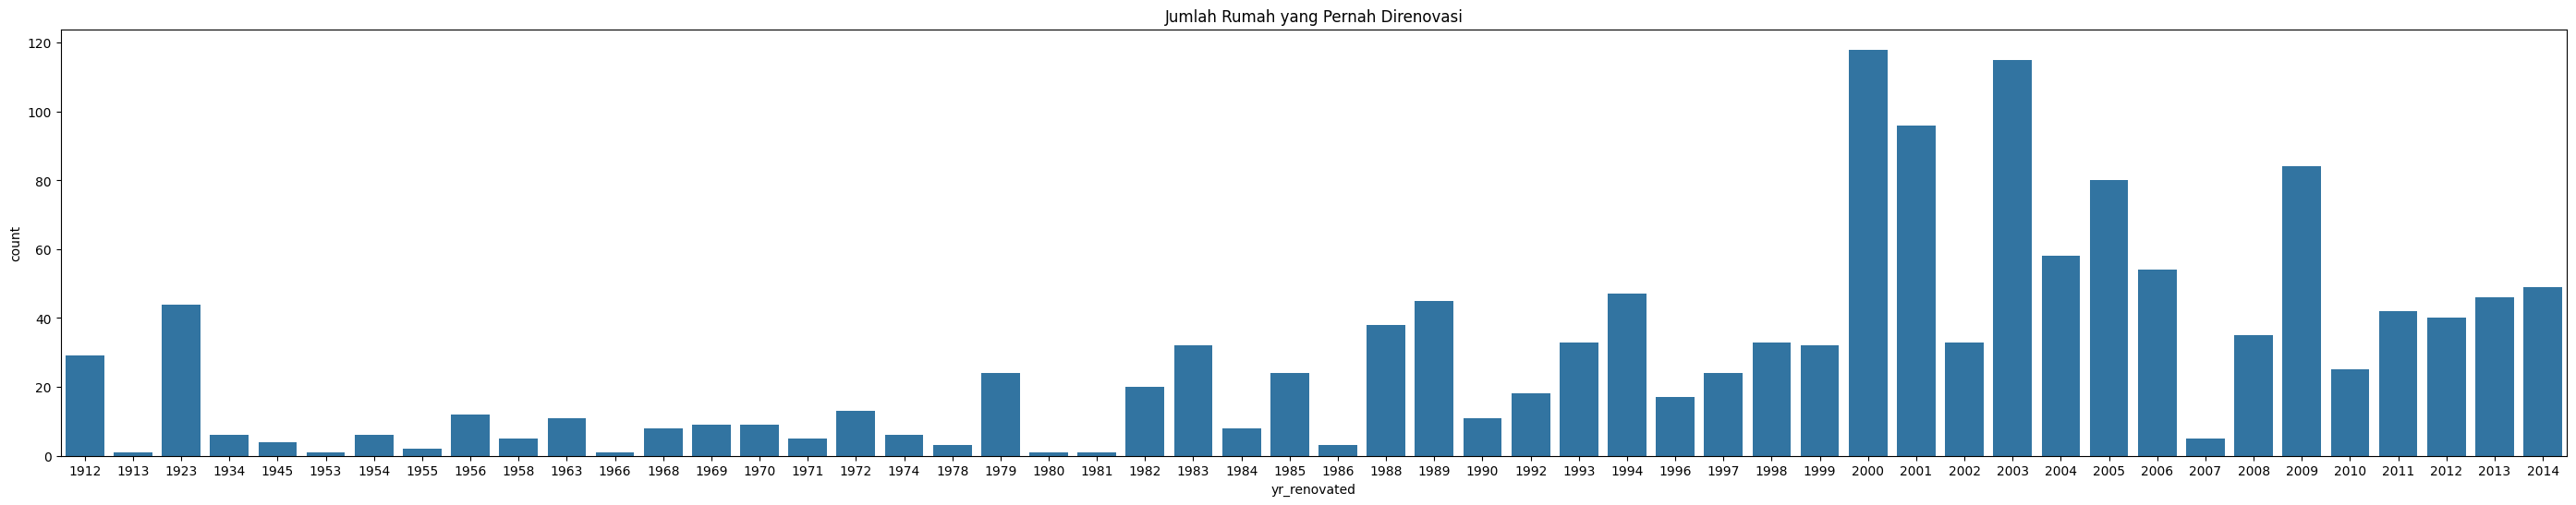

In [17]:
df=df[df['yr_renovated'] != 0]
plt.figure(figsize=(35, 6))
sns.countplot(x='yr_renovated', data=df)
plt.title('Jumlah Rumah yang Pernah Direnovasi')
plt.show()

<ipython-input-18-c8db96a8aa31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


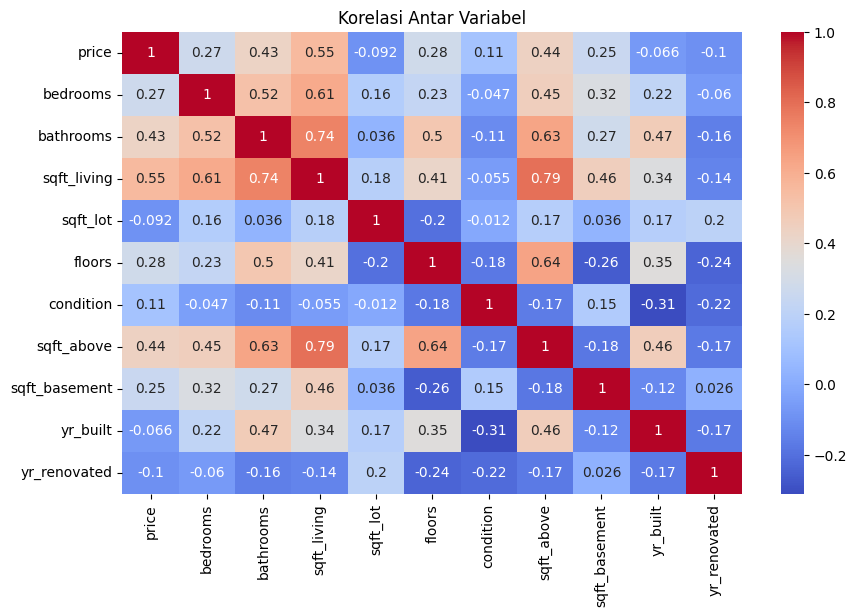

In [18]:
df['date'] = pd.to_datetime(df['date'])
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

# **5. Rekomendasi Rumah**
Syarat: Tahun pembangunan minimal 1990 atau jika sebelum 1990 harus direnovasi setelah 2000

# **Clustering dengan K-Means**

In [19]:
features = df[['price', 'yr_built', 'yr_renovated']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# **Elbow Method**

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

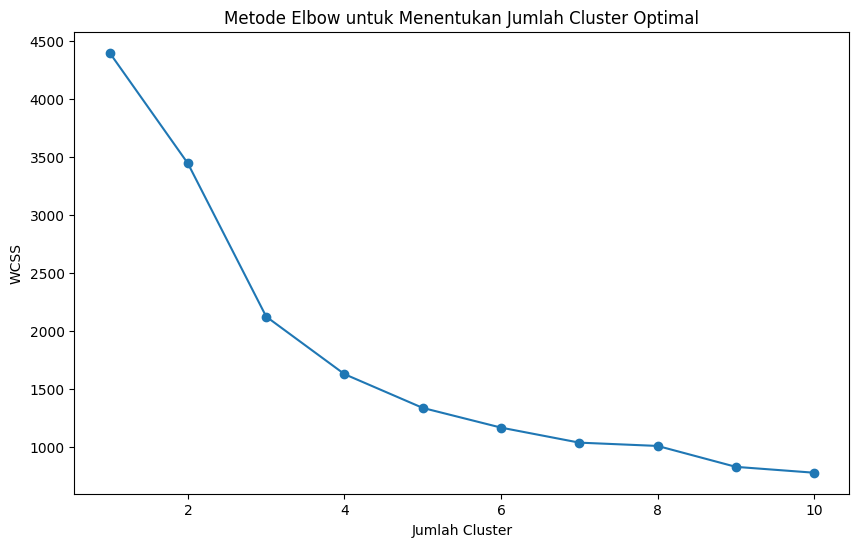

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Clustering dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)
df

<ipython-input-22-9a63f586df0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(scaled_features)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,cluster
0,2014-05-02,313000.000000,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,18810 densmore ave n,shoreline,wa 98133,usa,1
4,2014-05-02,550000.000000,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,9105 170th ave ne,redmond,wa 98052,usa,0
5,2014-05-02,490000.000000,2.0,1.00,880,6380,1.0,3,880,0,1938,1994,522 ne 88th st,seattle,wa 98115,usa,1
9,2014-05-02,640000.000000,4.0,2.00,1520,6200,1.5,3,1520,0,1945,2010,6811 55th ave ne,seattle,wa 98115,usa,1
10,2014-05-02,463000.000000,3.0,1.75,1710,7320,1.0,3,1710,0,1948,1994,burke-gilman trail,lake forest park,wa 98155,usa,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,2014-07-08,229629.500000,2.0,1.00,770,8149,1.0,3,770,0,1948,1994,16040 28th ave ne,shoreline,wa 98155,usa,1
4589,2014-07-08,182805.000000,3.0,1.00,1040,8892,1.0,4,800,240,1958,1972,1028 sw 307th st,federal way,wa 98023,usa,1
4593,2014-07-08,289373.307692,3.0,2.50,2538,4600,2.0,3,2538,0,2013,1923,5703 charlotte ave se,auburn,wa 98092,usa,0
4595,2014-07-09,308166.666667,3.0,1.75,1510,6360,1.0,4,1510,0,1954,1979,501 n 143rd st,seattle,wa 98133,usa,1


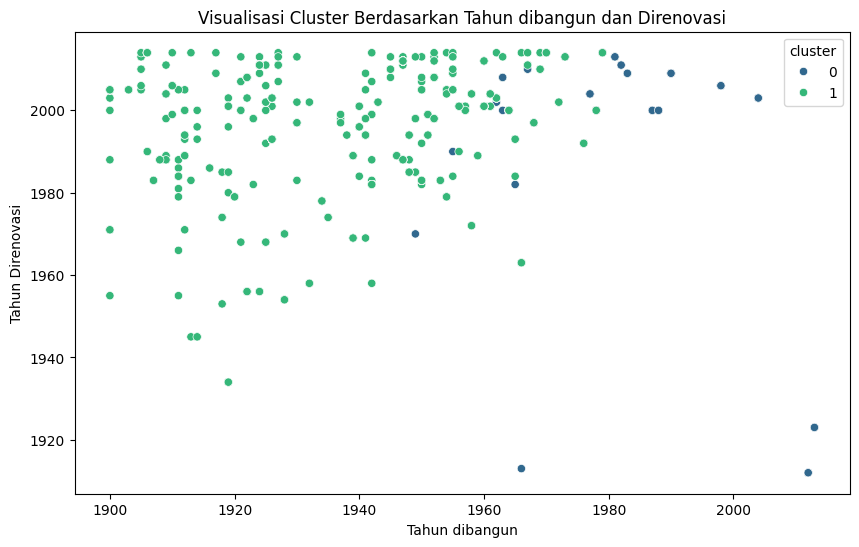

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_built', y='yr_renovated', hue='cluster', data=df, palette='viridis')
plt.title('Visualisasi Cluster Berdasarkan Tahun dibangun dan Direnovasi')
plt.xlabel('Tahun dibangun')
plt.ylabel('Tahun Direnovasi')
plt.show()

In [24]:
filtered_data = df[(df['yr_built'] >= 1990) | ((df['yr_built'] < 1990) & (df['yr_renovated'] > 2000))]
recommendations = filtered_data.sort_values(by='price').head(10)
print(recommendations[['city', 'price', 'yr_built', 'yr_renovated', 'cluster']])

             city     price  yr_built  yr_renovated  cluster
1283      seattle   90000.0      1943          2002        1
588      kirkland   90000.0      1973          2013        1
2329      seattle  110000.0      1927          2011        1
1266       auburn  132500.0      1967          2011        1
326     skykomish  134000.0      1922          2003        1
190   federal way  136500.0      1962          2003        1
928       seattle  137000.0      1954          2005        1
1541       seatac  145000.0      1954          2005        1
1236      seattle  149000.0      1955          2005        1
1168      seattle  150000.0      1954          2005        1


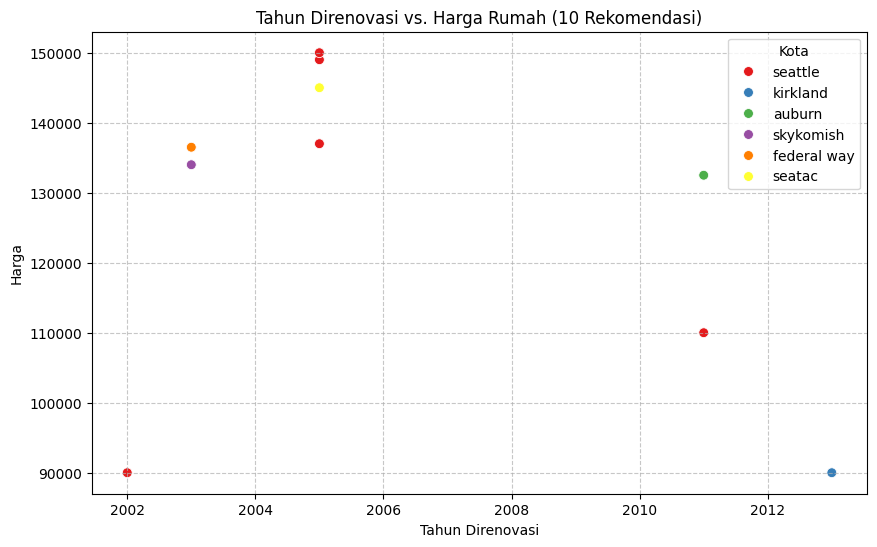

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_renovated', y='price', data=recommendations, hue='city', palette='Set1', s=50)
plt.title('Tahun Direnovasi vs. Harga Rumah (10 Rekomendasi)')
plt.xlabel('Tahun Direnovasi')
plt.ylabel('Harga')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Kota')
plt.show()